# Convert NetCDF Contour to GeoJSON

We first load useful libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import geojson
from geojson import Feature, LineString, FeatureCollection
import warnings
warnings.filterwarnings("ignore")

We specify the data path

In [3]:
file = '../../DATA/wind.nc'
ds = xr.open_dataset(file) 
ds

<xarray.Dataset>
Dimensions:      (FNOCXN79_64: 144, FNOCY: 73, TIME: 1)
Coordinates:
  * FNOCXN79_64  (FNOCXN79_64) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
  * FNOCY        (FNOCY) float64 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * TIME         (TIME) datetime64[ns] 1982-01-16T20:00:00
Data variables:
    UWND         (TIME, FNOCY, FNOCXN79_64) float32 ...
Attributes:
    history:      FERRET V7.3 (optimized) 16-Mar-18
    Conventions:  CF-1.6

We define lat/lon and variables from the netCDF file. 

In [13]:
lats=ds.FNOCY
lons=ds.FNOCXN79_64
variable=ds.UWND

We create a map with the variable displayed on a global scale

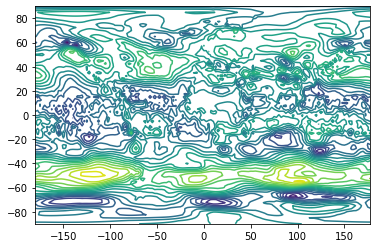

In [14]:
figure = plt.figure()
ax = figure.add_subplot(111)
contour = ax.contour(lons, lats, variable[0], levels=np.linspace(start=-15, stop=15, num=20), cmap=plt.cm.viridis)

We save the contour plots in an array

In [16]:
line_features = []
for collection in contour.collections:
    paths = collection.get_paths()
    color = collection.get_edgecolor()
    for path in paths:
        v = path.vertices
        coordinates = []
        for i in range(len(v)):
            lat = v[i][0]
            lon = v[i][1]
            coordinates.append((lat, lon))
        line = LineString(coordinates)
        properties = {
            "opacity": .5,
            "stroke-width": .5,
            "stroke": rgb2hex(color[0]),
        }
        line_features.append(Feature(geometry=line, properties=properties))

We finally create the goejson file

In [17]:
feature_collection = FeatureCollection(line_features)
geojson_dump = geojson.dumps(feature_collection, sort_keys=True)
with open('../../OUTPUT/wind_contour_to.geojson', 'w') as fileout:
    fileout.write(geojson_dump)

Plot the colors to embed into JS

In [ ]:
from pylab import *

cmap = cm.get_cmap('Reds', 10) 

for i in range(cmap.N):
    rgba = cmap(i)
    print(matplotlib.colors.rgb2hex(rgba))